### **PREDIÇÃO POR AM - DADOS DO HOSPITAL SÍRIO-LIBANÊS (HSL)**



Data: 22/10/2021

Filipe Loyola Lopes





Informativo: 

GRUPO_0 - pacientes com exames provindos apenas do pronto socorro (NÃO_GRAVE); 

GRUPO_1 - pacientes com exames provindos do pronto socorro e internação (NÃO_GRAVE);

GRUPO_2 - pacientes com exames provindos do pronto socorro e UTI (GRAVE).

GRUPO_3 - pacientes com exames provindos do pronto socorro, internação e UTI (GRAVE).

# **CENÁRIO 5:** 

# **GRUPO 0 + GRUPO 1 (NÃO GRAVE)**

# **GRUPO 2 + GRUPO 3 (GRAVE)**

In [1]:
#Bibliotecas

import numpy as np
import pandas as pd
from pandas import DataFrame
import csv
from numpy import mean
from numpy import std
from numpy import correlate
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from google.colab import files
import datetime as dt
from matplotlib import pyplot as plt
plt.style.use('default')
import seaborn as sns
import warnings
import datetime as dt
from datetime import date

import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, SelectPercentile

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **IMPORTAÇÃO DOS DADOS**

In [ ]:
df_sirio = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2021 dezembro Artigo/AM/sirio_aprendizado_v3.csv', sep='|', encoding='utf-8')
print(df_sirio.shape)
df_sirio.head(3)

(4320, 33)


,Unnamed: 0,ID_PACIENTE,GRUPO,Idade,Sexo,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO
0,0,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,54,M,26.0,24.0,40.0,0.6,34.5,1.02,60.0,0.9,4.65,29.7,40.0,13.8,6440.0,1000.0,15.5,320.0,5.0,5020.0,78.0,176000.0,4.0,0.11,13.1,138.0,35.0,86.0,9.8,1
1,1,000F0BC139D2846DB86AA32B8F05B215,GRUPO_0,41,M,NaN,NaN,20.0,0.4,33.2,1.04,160.0,3.4,4.71,27.6,39.2,13.0,4730.0,2360.0,49.9,420.0,8.9,1770.0,37.4,279000.0,4.3,NaN,14.0,142.0,33.0,83.2,10.0,1
2,2,0028785949D91BD93442838FC898E229,GRUPO_0,31,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df_sirio = df_sirio.drop(columns=(['Unnamed: 0', 'Sexo']))
print(df_sirio.shape)
df_sirio.head(1)

(4320, 31)


,ID_PACIENTE,GRUPO,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO
0,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,54,26.0,24.0,40.0,0.6,34.5,1.02,60.0,0.9,4.65,29.7,40.0,13.8,6440.0,1000.0,15.5,320.0,5.0,5020.0,78.0,176000.0,4.0,0.11,13.1,138.0,35.0,86.0,9.8,1


In [ ]:
cenario1 = df_sirio

#cenario1.drop(cenario1.loc[cenario1['GRUPO']=='GRUPO_1'].index, inplace=True)

#cenario1.drop(cenario1.loc[cenario1['GRUPO']=='GRUPO_3'].index, inplace=True)

print('GRUPO_0: ', cenario1[cenario1['GRUPO']=='GRUPO_0'].shape)

print('GRUPO_1: ', cenario1[cenario1['GRUPO']=='GRUPO_1'].shape)

print('GRUPO_2: ', cenario1[cenario1['GRUPO']=='GRUPO_2'].shape)

print('GRUPO_3: ', cenario1[cenario1['GRUPO']=='GRUPO_3'].shape)

GRUPO_0:  (3393, 31)
GRUPO_1:  (533, 31)
GRUPO_2:  (85, 31)
GRUPO_3:  (309, 31)


### **CRIANDO COLUNA GRAVIDADE (TARGET)**

GRAVE -> 1

NÃO GRAVE -> 0

*   Item da lista
*   Item da lista



In [ ]:
d_2 = {'GRUPO_2' : 1, 'GRUPO_3' : 1, 'GRUPO_0':0, 'GRUPO_1' : 0}
cenario1['GRAVIDADE'] = cenario1['GRUPO'].map(d_2) #colocando 0 e 1 na coluna target
cenario1.head(6)

,ID_PACIENTE,GRUPO,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
0,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,54,26.0,24.0,40.0,0.6,34.5,1.02,60.0,0.9,4.65,29.7,40.0,13.8,6440.0,1000.0,15.5,320.0,5.0,5020.0,78.0,176000.0,4.0,0.11,13.1,138.0,35.0,86.0,9.8,1,0
1,000F0BC139D2846DB86AA32B8F05B215,GRUPO_0,41,NaN,NaN,20.0,0.4,33.2,1.04,160.0,3.4,4.71,27.6,39.2,13.0,4730.0,2360.0,49.9,420.0,8.9,1770.0,37.4,279000.0,4.3,NaN,14.0,142.0,33.0,83.2,10.0,1,0
2,0028785949D91BD93442838FC898E229,GRUPO_0,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,002B919CC409B11DE52FB212379BE2CB,GRUPO_0,41,26.0,26.0,40.0,0.6,32.9,0.73,240.0,3.4,4.69,29.0,41.4,13.6,7050.0,1630.0,23.1,590.0,8.4,4550.0,64.5,275000.0,NaN,0.12,13.3,NaN,30.0,88.3,11.2,0,0
4,003051C9B19101D1C10C5DC654384017,GRUPO_0,36,27.0,18.0,10.0,0.3,33.4,0.97,30.0,0.9,4.97,28.0,41.6,13.9,3240.0,1390.0,42.9,250.0,7.7,1560.0,48.2,231000.0,4.2,0.08,14.4,139.0,16.0,83.7,10.4,1,0
5,003F1F4C194763E4A00FD809AF5FA6AA,GRUPO_1,65,79.0,76.0,10.0,0.2,33.4,0.95,10.0,0.2,4.63,30.7,42.5,14.2,5460.0,960.0,17.6,350.0,6.4,4130.0,75.6,212000.0,4.2,14.09,12.9,135.0,25.0,91.8,10.2,1,0


In [ ]:
cenario1 = cenario1.drop(columns=['GRUPO'])

### **SEPARANDO GRUPOS PARA TREINO E GRUPOS PARA TESTE**

In [ ]:
#obs: apagar coluna GRAVIDADE depois

X_train, X_test, y_train, y_test = train_test_split(cenario1.drop(['ID_PACIENTE'], axis=1), cenario1['GRAVIDADE'],
                                                    test_size = 0.3, random_state=0)
print('Dados de treino {}'.format(X_train.shape))
print('\n')
print("Dados de teste{}". format(X_test.shape))

Dados de treino (3024, 30)


Dados de teste(1296, 30)


In [ ]:
y_train[y_train == 0].shape

(2742,)

In [ ]:
y_train[y_train == 1].shape

(282,)

In [ ]:
y_test[y_test == 0].shape

(1184,)

In [ ]:
y_test[y_test == 1].shape

(112,)

In [ ]:
X_train.head(20)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
1850,41,NaN,NaN,40.0,0.6,35.3,0.94,180.0,2.7,4.20,32.1,38.2,13.5,6570.0,2060.0,31.4,500.0,7.6,3790.0,57.7,237000.0,4.3,0.05,11.3,140.0,25.0,91.0,9.6,1,0
1702,68,23.0,20.0,50.0,0.7,33.8,0.89,120.0,1.8,5.40,29.3,46.7,15.8,6690.0,2080.0,31.1,370.0,5.5,4070.0,60.9,233000.0,4.0,NaN,13.3,140.0,35.0,86.5,10.7,1,0
3489,40,26.0,23.0,30.0,0.3,34.0,0.74,90.0,0.8,4.85,28.7,40.9,13.9,10690.0,2440.0,22.8,500.0,4.7,7630.0,71.4,216000.0,3.8,0.15,13.2,139.0,28.0,84.3,12.3,0,0
175,46,94.0,84.0,30.0,0.7,33.8,1.25,120.0,2.7,4.63,31.1,42.6,14.4,4380.0,1810.0,41.3,650.0,14.8,1770.0,40.5,194000.0,3.8,2.55,15.0,142.0,23.0,92.0,9.6,1,0
981,35,NaN,NaN,20.0,0.4,33.9,0.79,160.0,3.3,4.58,27.9,37.8,12.8,4890.0,2300.0,47.0,300.0,6.1,2110.0,43.2,293000.0,NaN,NaN,13.2,NaN,NaN,82.5,10.0,0,0
2553,68,29.0,25.0,20.0,0.6,33.6,0.84,30.0,0.9,4.47,30.4,40.5,13.6,3310.0,1140.0,34.4,460.0,13.9,1660.0,50.2,235000.0,4.2,0.17,12.6,136.0,32.0,90.6,9.5,0,0
826,27,29.0,21.0,40.0,0.7,34.4,0.62,120.0,2.1,4.30,31.4,39.3,13.5,5820.0,2460.0,42.3,590.0,10.1,2610.0,44.8,221000.0,NaN,NaN,12.0,NaN,NaN,91.4,11.1,0,0
3838,56,NaN,NaN,20.0,0.5,34.7,NaN,160.0,3.7,4.65,32.0,43.0,14.9,4370.0,1400.0,32.0,420.0,9.6,2370.0,54.2,191000.0,NaN,NaN,11.3,NaN,NaN,92.5,9.6,1,0
3071,46,NaN,NaN,0.0,0.0,34.8,0.68,0.0,0.0,4.19,31.7,38.2,13.3,5400.0,390.0,7.2,140.0,2.6,4870.0,90.2,209000.0,3.9,0.07,11.8,138.0,18.0,91.2,10.6,0,0
1254,77,12.0,21.0,40.0,0.9,33.1,0.89,70.0,1.6,4.17,33.1,41.7,13.8,4280.0,1750.0,40.9,280.0,6.5,2140.0,50.1,218000.0,4.5,NaN,13.0,140.0,46.0,100.0,11.3,0,0


In [ ]:
y_train.head(3)

1850    0
1702    0
3489    0
Name: GRAVIDADE, dtype: int64

In [ ]:
X_test.head(3)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
651,35,10.0,17.0,30.0,0.4,34.4,0.67,70.0,1.0,4.58,31.0,41.3,14.2,6780.0,2760.0,40.7,460.0,6.8,3460.0,51.1,246000.0,NaN,0.07,11.9,NaN,31.0,90.2,9.6,0,0
1535,38,18.0,26.0,40.0,0.7,33.3,0.96,140.0,2.3,5.61,29.1,49.0,16.3,5980.0,1890.0,31.6,900.0,15.1,3010.0,50.3,248000.0,4.9,NaN,13.5,142.0,NaN,87.3,12.0,1,0
2470,46,27.0,21.0,30.0,0.5,33.5,0.96,10.0,0.2,4.58,30.3,41.5,13.9,6160.0,1310.0,21.3,460.0,7.5,4350.0,70.5,239000.0,4.3,0.04,13.2,141.0,24.0,90.6,11.9,0,0


In [ ]:
y_test.head(3)

651     0
1535    0
2470    0
Name: GRAVIDADE, dtype: int64

In [ ]:
X_train.head(20)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
1850,41,NaN,NaN,40.0,0.6,35.3,0.94,180.0,2.7,4.20,32.1,38.2,13.5,6570.0,2060.0,31.4,500.0,7.6,3790.0,57.7,237000.0,4.3,0.05,11.3,140.0,25.0,91.0,9.6,1,0
1702,68,23.0,20.0,50.0,0.7,33.8,0.89,120.0,1.8,5.40,29.3,46.7,15.8,6690.0,2080.0,31.1,370.0,5.5,4070.0,60.9,233000.0,4.0,NaN,13.3,140.0,35.0,86.5,10.7,1,0
3489,40,26.0,23.0,30.0,0.3,34.0,0.74,90.0,0.8,4.85,28.7,40.9,13.9,10690.0,2440.0,22.8,500.0,4.7,7630.0,71.4,216000.0,3.8,0.15,13.2,139.0,28.0,84.3,12.3,0,0
175,46,94.0,84.0,30.0,0.7,33.8,1.25,120.0,2.7,4.63,31.1,42.6,14.4,4380.0,1810.0,41.3,650.0,14.8,1770.0,40.5,194000.0,3.8,2.55,15.0,142.0,23.0,92.0,9.6,1,0
981,35,NaN,NaN,20.0,0.4,33.9,0.79,160.0,3.3,4.58,27.9,37.8,12.8,4890.0,2300.0,47.0,300.0,6.1,2110.0,43.2,293000.0,NaN,NaN,13.2,NaN,NaN,82.5,10.0,0,0
2553,68,29.0,25.0,20.0,0.6,33.6,0.84,30.0,0.9,4.47,30.4,40.5,13.6,3310.0,1140.0,34.4,460.0,13.9,1660.0,50.2,235000.0,4.2,0.17,12.6,136.0,32.0,90.6,9.5,0,0
826,27,29.0,21.0,40.0,0.7,34.4,0.62,120.0,2.1,4.30,31.4,39.3,13.5,5820.0,2460.0,42.3,590.0,10.1,2610.0,44.8,221000.0,NaN,NaN,12.0,NaN,NaN,91.4,11.1,0,0
3838,56,NaN,NaN,20.0,0.5,34.7,NaN,160.0,3.7,4.65,32.0,43.0,14.9,4370.0,1400.0,32.0,420.0,9.6,2370.0,54.2,191000.0,NaN,NaN,11.3,NaN,NaN,92.5,9.6,1,0
3071,46,NaN,NaN,0.0,0.0,34.8,0.68,0.0,0.0,4.19,31.7,38.2,13.3,5400.0,390.0,7.2,140.0,2.6,4870.0,90.2,209000.0,3.9,0.07,11.8,138.0,18.0,91.2,10.6,0,0
1254,77,12.0,21.0,40.0,0.9,33.1,0.89,70.0,1.6,4.17,33.1,41.7,13.8,4280.0,1750.0,40.9,280.0,6.5,2140.0,50.1,218000.0,4.5,NaN,13.0,140.0,46.0,100.0,11.3,0,0


In [ ]:
target = X_train['GRAVIDADE']
target

1850    0
1702    0
3489    0
175     0
981     0
       ..
1033    0
3264    0
1653    0
2607    0
2732    0
Name: GRAVIDADE, Length: 3024, dtype: int64

### **PREPARANDO OS DADOS PARA O APRENDIZADO**

In [ ]:
Q1 = X_train.quantile(.25)
Q3 = X_train.quantile(.75)

IIQ = Q3 - Q1
limite_inferior = Q1 - 3*IIQ
limite_superior = Q3 + 3*IIQ

In [ ]:
#aplicando o filtro apenas nos dados de treino

selecao = (X_train >= limite_inferior) & (X_train <= limite_superior)

novos_dados = X_train[selecao]

#novos_dados.apply(lambda x: x.fillna(x.median()), axis=0)

In [ ]:
novos_dados.head(20)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
1850,41,NaN,NaN,40.0,0.6,35.3,0.94,180.0,2.7,4.20,32.1,38.2,13.5,6570.0,2060.0,31.4,500.0,7.6,3790.0,57.7,237000.0,4.3,0.05,11.3,140.0,25.0,91.0,9.6,1,0.0
1702,68,23.0,20.0,50.0,0.7,33.8,0.89,120.0,1.8,5.40,29.3,46.7,15.8,6690.0,2080.0,31.1,370.0,5.5,4070.0,60.9,233000.0,4.0,NaN,13.3,140.0,35.0,86.5,10.7,1,0.0
3489,40,26.0,23.0,30.0,0.3,34.0,0.74,90.0,0.8,4.85,28.7,40.9,13.9,10690.0,2440.0,22.8,500.0,4.7,7630.0,71.4,216000.0,3.8,0.15,13.2,139.0,28.0,84.3,12.3,0,0.0
175,46,94.0,NaN,30.0,0.7,33.8,1.25,120.0,2.7,4.63,31.1,42.6,14.4,4380.0,1810.0,41.3,650.0,14.8,1770.0,40.5,194000.0,3.8,2.55,15.0,142.0,23.0,92.0,9.6,1,0.0
981,35,NaN,NaN,20.0,0.4,33.9,0.79,160.0,3.3,4.58,27.9,37.8,12.8,4890.0,2300.0,47.0,300.0,6.1,2110.0,43.2,293000.0,NaN,NaN,13.2,NaN,NaN,82.5,10.0,0,0.0
2553,68,29.0,25.0,20.0,0.6,33.6,0.84,30.0,0.9,4.47,30.4,40.5,13.6,3310.0,1140.0,34.4,460.0,13.9,1660.0,50.2,235000.0,4.2,0.17,12.6,136.0,32.0,90.6,9.5,0,0.0
826,27,29.0,21.0,40.0,0.7,34.4,0.62,120.0,2.1,4.30,31.4,39.3,13.5,5820.0,2460.0,42.3,590.0,10.1,2610.0,44.8,221000.0,NaN,NaN,12.0,NaN,NaN,91.4,11.1,0,0.0
3838,56,NaN,NaN,20.0,0.5,34.7,NaN,160.0,3.7,4.65,32.0,43.0,14.9,4370.0,1400.0,32.0,420.0,9.6,2370.0,54.2,191000.0,NaN,NaN,11.3,NaN,NaN,92.5,9.6,1,0.0
3071,46,NaN,NaN,0.0,0.0,34.8,0.68,0.0,0.0,4.19,31.7,38.2,13.3,5400.0,390.0,7.2,140.0,2.6,4870.0,90.2,209000.0,3.9,0.07,11.8,138.0,18.0,91.2,10.6,0,0.0
1254,77,12.0,21.0,40.0,0.9,33.1,0.89,70.0,1.6,4.17,33.1,41.7,13.8,4280.0,1750.0,40.9,280.0,6.5,2140.0,50.1,218000.0,4.5,NaN,13.0,140.0,46.0,100.0,11.3,0,0.0


In [ ]:
novos_dados['GRAVIDADE'] = target

In [ ]:
novos_dados.head(20)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
1850,41,NaN,NaN,40.0,0.6,35.3,0.94,180.0,2.7,4.20,32.1,38.2,13.5,6570.0,2060.0,31.4,500.0,7.6,3790.0,57.7,237000.0,4.3,0.05,11.3,140.0,25.0,91.0,9.6,1,0
1702,68,23.0,20.0,50.0,0.7,33.8,0.89,120.0,1.8,5.40,29.3,46.7,15.8,6690.0,2080.0,31.1,370.0,5.5,4070.0,60.9,233000.0,4.0,NaN,13.3,140.0,35.0,86.5,10.7,1,0
3489,40,26.0,23.0,30.0,0.3,34.0,0.74,90.0,0.8,4.85,28.7,40.9,13.9,10690.0,2440.0,22.8,500.0,4.7,7630.0,71.4,216000.0,3.8,0.15,13.2,139.0,28.0,84.3,12.3,0,0
175,46,94.0,NaN,30.0,0.7,33.8,1.25,120.0,2.7,4.63,31.1,42.6,14.4,4380.0,1810.0,41.3,650.0,14.8,1770.0,40.5,194000.0,3.8,2.55,15.0,142.0,23.0,92.0,9.6,1,0
981,35,NaN,NaN,20.0,0.4,33.9,0.79,160.0,3.3,4.58,27.9,37.8,12.8,4890.0,2300.0,47.0,300.0,6.1,2110.0,43.2,293000.0,NaN,NaN,13.2,NaN,NaN,82.5,10.0,0,0
2553,68,29.0,25.0,20.0,0.6,33.6,0.84,30.0,0.9,4.47,30.4,40.5,13.6,3310.0,1140.0,34.4,460.0,13.9,1660.0,50.2,235000.0,4.2,0.17,12.6,136.0,32.0,90.6,9.5,0,0
826,27,29.0,21.0,40.0,0.7,34.4,0.62,120.0,2.1,4.30,31.4,39.3,13.5,5820.0,2460.0,42.3,590.0,10.1,2610.0,44.8,221000.0,NaN,NaN,12.0,NaN,NaN,91.4,11.1,0,0
3838,56,NaN,NaN,20.0,0.5,34.7,NaN,160.0,3.7,4.65,32.0,43.0,14.9,4370.0,1400.0,32.0,420.0,9.6,2370.0,54.2,191000.0,NaN,NaN,11.3,NaN,NaN,92.5,9.6,1,0
3071,46,NaN,NaN,0.0,0.0,34.8,0.68,0.0,0.0,4.19,31.7,38.2,13.3,5400.0,390.0,7.2,140.0,2.6,4870.0,90.2,209000.0,3.9,0.07,11.8,138.0,18.0,91.2,10.6,0,0
1254,77,12.0,21.0,40.0,0.9,33.1,0.89,70.0,1.6,4.17,33.1,41.7,13.8,4280.0,1750.0,40.9,280.0,6.5,2140.0,50.1,218000.0,4.5,NaN,13.0,140.0,46.0,100.0,11.3,0,0


In [ ]:
novos_dados[novos_dados['GRAVIDADE']==1]

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
1047,41,28.0,15.0,20.0,0.4,34.0,0.76,50.0,0.9,4.81,29.4,40.4,13.5,5610.0,1430.0,25.5,790.0,10.3,3320.0,52.6,234000.0,3.7,NaN,14.3,139.0,27.0,84.0,9.8,1,1
3158,90,NaN,NaN,40.0,0.4,33.6,1.52,20.0,0.2,4.11,30.2,36.9,12.4,10050.0,480.0,4.8,1350.0,13.4,8160.0,81.2,243000.0,NaN,NaN,13.6,NaN,70.0,89.8,NaN,1,1
240,49,NaN,NaN,60.0,1.3,33.1,NaN,330.0,6.9,4.91,29.5,43.8,14.5,4770.0,1750.0,36.7,370.0,7.8,2260.0,47.3,312000.0,NaN,0.08,13.9,NaN,NaN,89.2,9.4,1,1
264,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2753,73,13.0,15.0,10.0,0.3,32.6,0.70,70.0,1.9,4.62,29.9,42.3,13.8,3720.0,1470.0,39.5,630.0,16.9,1540.0,41.4,189000.0,NaN,0.19,13.8,NaN,27.0,91.6,10.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3560,61,NaN,NaN,30.0,0.5,34.2,NaN,210.0,3.8,3.60,34.2,36.0,12.3,5580.0,1820.0,32.6,560.0,10.0,2960.0,53.1,293000.0,NaN,0.29,11.9,NaN,NaN,100.0,11.4,1,1
714,66,16.0,19.0,40.0,1.0,32.6,0.71,150.0,3.8,4.49,28.7,39.6,12.9,3930.0,550.0,14.0,460.0,11.7,2730.0,69.5,148000.0,3.9,3.34,13.9,141.0,33.0,88.2,10.7,0,1
755,62,NaN,NaN,0.0,0.0,33.9,0.64,0.0,0.0,5.27,28.7,44.5,15.1,4860.0,1090.0,22.4,330.0,6.8,3440.0,70.8,131000.0,3.1,1.38,14.2,137.0,27.0,84.4,11.4,0,1
2046,58,13.0,17.0,20.0,0.5,35.3,0.76,10.0,0.2,4.07,34.2,37.5,12.5,4380.0,2370.0,54.1,500.0,11.4,1480.0,21.6,200000.0,3.9,0.09,14.5,139.0,34.0,92.1,8.7,0,1


### **TRATANDO VALORES AUSENTES**

In [ ]:
novos_dados.isnull().sum()

Idade                          0
ALT (TGP)                   1135
AST (TGO)                   1152
Basófilos                    285
Basófilos (%)                273
CHCM                         272
Creatinina                   627
Eosinófilos                  299
Eosinófilos (%)              308
Eritrócitos                  272
HCM                          300
Hematócrito                  270
Hemoglobina                  267
Leucócitos                   292
Linfócitos                   275
Linfócitos (%)               271
Monócitos                    288
Monócitos (%)                283
Neutrófilos                  308
Neutrófilos (%)              270
Plaquetas                    269
Potássio                    1011
Proteína C-Reativa          1048
RDW                          330
Sódio                       1050
Uréia                        778
VCM                          294
Volume plaquetário médio     297
SEXO                           0
GRAVIDADE                      0
dtype: int

In [ ]:
mediana_NAO_GRAVE = novos_dados[novos_dados['GRAVIDADE']==0].median(skipna=True)
mediana_NAO_GRAVE

Idade                           43.00
ALT (TGP)                       22.00
AST (TGO)                       22.00
Basófilos                       30.00
Basófilos (%)                    0.50
CHCM                            33.60
Creatinina                       0.89
Eosinófilos                     80.00
Eosinófilos (%)                  1.40
Eritrócitos                      4.73
HCM                             29.60
Hematócrito                     41.40
Hemoglobina                     13.90
Leucócitos                    5885.00
Linfócitos                    1720.00
Linfócitos (%)                  30.30
Monócitos                      510.00
Monócitos (%)                    8.50
Neutrófilos                   3350.00
Neutrófilos (%)                 58.15
Plaquetas                   226000.00
Potássio                         4.00
Proteína C-Reativa               0.33
RDW                             12.70
Sódio                          139.00
Uréia                           29.00
VCM         

In [ ]:
mediana_GRAVE = novos_dados[novos_dados['GRAVIDADE']==1].median(skipna=True)
mediana_GRAVE

Idade                           64.00
ALT (TGP)                       26.00
AST (TGO)                       23.00
Basófilos                       30.00
Basófilos (%)                    0.45
CHCM                            33.30
Creatinina                       0.96
Eosinófilos                     85.00
Eosinófilos (%)                  1.30
Eritrócitos                      4.68
HCM                             29.80
Hematócrito                     41.30
Hemoglobina                     13.70
Leucócitos                    6340.00
Linfócitos                    1430.00
Linfócitos (%)                  23.90
Monócitos                      610.00
Monócitos (%)                    8.80
Neutrófilos                   3960.00
Neutrófilos (%)                 63.75
Plaquetas                   215000.00
Potássio                         4.10
Proteína C-Reativa               0.49
RDW                             13.40
Sódio                          139.00
Uréia                           35.00
VCM         

In [ ]:
mediana_GRAVE - mediana_NAO_GRAVE

Idade                          21.00
ALT (TGP)                       4.00
AST (TGO)                       1.00
Basófilos                       0.00
Basófilos (%)                  -0.05
CHCM                           -0.30
Creatinina                      0.07
Eosinófilos                     5.00
Eosinófilos (%)                -0.10
Eritrócitos                    -0.05
HCM                             0.20
Hematócrito                    -0.10
Hemoglobina                    -0.20
Leucócitos                    455.00
Linfócitos                   -290.00
Linfócitos (%)                 -6.40
Monócitos                     100.00
Monócitos (%)                   0.30
Neutrófilos                   610.00
Neutrófilos (%)                 5.60
Plaquetas                  -11000.00
Potássio                        0.10
Proteína C-Reativa              0.16
RDW                             0.70
Sódio                           0.00
Uréia                           6.00
VCM                             1.35
V

In [ ]:
novos_dados.loc[novos_dados['GRAVIDADE']==0] = novos_dados[novos_dados['GRAVIDADE']==0].fillna(mediana_NAO_GRAVE)

novos_dados.head(10)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
1850,41,22.0,22.0,40.0,0.6,35.3,0.94,180.0,2.7,4.20,32.1,38.2,13.5,6570.0,2060.0,31.4,500.0,7.6,3790.0,57.7,237000.0,4.3,0.05,11.3,140.0,25.0,91.0,9.6,1,0
1702,68,23.0,20.0,50.0,0.7,33.8,0.89,120.0,1.8,5.40,29.3,46.7,15.8,6690.0,2080.0,31.1,370.0,5.5,4070.0,60.9,233000.0,4.0,0.33,13.3,140.0,35.0,86.5,10.7,1,0
3489,40,26.0,23.0,30.0,0.3,34.0,0.74,90.0,0.8,4.85,28.7,40.9,13.9,10690.0,2440.0,22.8,500.0,4.7,7630.0,71.4,216000.0,3.8,0.15,13.2,139.0,28.0,84.3,12.3,0,0
175,46,94.0,22.0,30.0,0.7,33.8,1.25,120.0,2.7,4.63,31.1,42.6,14.4,4380.0,1810.0,41.3,650.0,14.8,1770.0,40.5,194000.0,3.8,2.55,15.0,142.0,23.0,92.0,9.6,1,0
981,35,22.0,22.0,20.0,0.4,33.9,0.79,160.0,3.3,4.58,27.9,37.8,12.8,4890.0,2300.0,47.0,300.0,6.1,2110.0,43.2,293000.0,4.0,0.33,13.2,139.0,29.0,82.5,10.0,0,0
2553,68,29.0,25.0,20.0,0.6,33.6,0.84,30.0,0.9,4.47,30.4,40.5,13.6,3310.0,1140.0,34.4,460.0,13.9,1660.0,50.2,235000.0,4.2,0.17,12.6,136.0,32.0,90.6,9.5,0,0
826,27,29.0,21.0,40.0,0.7,34.4,0.62,120.0,2.1,4.30,31.4,39.3,13.5,5820.0,2460.0,42.3,590.0,10.1,2610.0,44.8,221000.0,4.0,0.33,12.0,139.0,29.0,91.4,11.1,0,0
3838,56,22.0,22.0,20.0,0.5,34.7,0.89,160.0,3.7,4.65,32.0,43.0,14.9,4370.0,1400.0,32.0,420.0,9.6,2370.0,54.2,191000.0,4.0,0.33,11.3,139.0,29.0,92.5,9.6,1,0
3071,46,22.0,22.0,0.0,0.0,34.8,0.68,0.0,0.0,4.19,31.7,38.2,13.3,5400.0,390.0,7.2,140.0,2.6,4870.0,90.2,209000.0,3.9,0.07,11.8,138.0,18.0,91.2,10.6,0,0
1254,77,12.0,21.0,40.0,0.9,33.1,0.89,70.0,1.6,4.17,33.1,41.7,13.8,4280.0,1750.0,40.9,280.0,6.5,2140.0,50.1,218000.0,4.5,0.33,13.0,140.0,46.0,100.0,11.3,0,0


In [ ]:
print(novos_dados[novos_dados['GRAVIDADE']==0].shape)

(2742, 30)


In [ ]:
novos_dados.loc[novos_dados['GRAVIDADE']==1] = novos_dados[novos_dados['GRAVIDADE']==1].fillna(mediana_GRAVE)


In [ ]:
print(novos_dados[novos_dados['GRAVIDADE']==1].shape)

novos_dados[novos_dados['GRAVIDADE']==1].head()

(282, 30)


,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
1047,41,28.0,15.0,20.0,0.40,34.0,0.76,50.0,0.9,4.81,29.4,40.4,13.5,5610.0,1430.0,25.5,790.0,10.3,3320.0,52.60,234000.0,3.7,0.49,14.3,139.0,27.0,84.00,9.80,1,1
3158,90,26.0,23.0,40.0,0.40,33.6,1.52,20.0,0.2,4.11,30.2,36.9,12.4,10050.0,480.0,4.8,1350.0,13.4,8160.0,81.20,243000.0,4.1,0.49,13.6,139.0,70.0,89.80,10.25,1,1
240,49,26.0,23.0,60.0,1.30,33.1,0.96,330.0,6.9,4.91,29.5,43.8,14.5,4770.0,1750.0,36.7,370.0,7.8,2260.0,47.30,312000.0,4.1,0.08,13.9,139.0,35.0,89.20,9.40,1,1
264,50,26.0,23.0,30.0,0.45,33.3,0.96,85.0,1.3,4.68,29.8,41.3,13.7,6340.0,1430.0,23.9,610.0,8.8,3960.0,63.75,215000.0,4.1,0.49,13.4,139.0,35.0,89.25,10.25,0,1
2753,73,13.0,15.0,10.0,0.30,32.6,0.70,70.0,1.9,4.62,29.9,42.3,13.8,3720.0,1470.0,39.5,630.0,16.9,1540.0,41.40,189000.0,4.1,0.19,13.8,139.0,27.0,91.60,10.50,1,1


In [ ]:
#verificando valores nulos
novos_dados.isnull().sum()

Idade                       0
ALT (TGP)                   0
AST (TGO)                   0
Basófilos                   0
Basófilos (%)               0
CHCM                        0
Creatinina                  0
Eosinófilos                 0
Eosinófilos (%)             0
Eritrócitos                 0
HCM                         0
Hematócrito                 0
Hemoglobina                 0
Leucócitos                  0
Linfócitos                  0
Linfócitos (%)              0
Monócitos                   0
Monócitos (%)               0
Neutrófilos                 0
Neutrófilos (%)             0
Plaquetas                   0
Potássio                    0
Proteína C-Reativa          0
RDW                         0
Sódio                       0
Uréia                       0
VCM                         0
Volume plaquetário médio    0
SEXO                        0
GRAVIDADE                   0
dtype: int64

In [ ]:
# Eliminando coluna target

novos_dados = novos_dados.drop(columns=['GRAVIDADE'])

print(novos_dados.shape)

novos_dados.head(3)

(3024, 29)


,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO
1850,41,22.0,22.0,40.0,0.6,35.3,0.94,180.0,2.7,4.20,32.1,38.2,13.5,6570.0,2060.0,31.4,500.0,7.6,3790.0,57.7,237000.0,4.3,0.05,11.3,140.0,25.0,91.0,9.6,1
1702,68,23.0,20.0,50.0,0.7,33.8,0.89,120.0,1.8,5.40,29.3,46.7,15.8,6690.0,2080.0,31.1,370.0,5.5,4070.0,60.9,233000.0,4.0,0.33,13.3,140.0,35.0,86.5,10.7,1
3489,40,26.0,23.0,30.0,0.3,34.0,0.74,90.0,0.8,4.85,28.7,40.9,13.9,10690.0,2440.0,22.8,500.0,4.7,7630.0,71.4,216000.0,3.8,0.15,13.2,139.0,28.0,84.3,12.3,0


### **INSERIR FEATURE RAZÃO NEUTROFILOS/LINFÓCITOS**

In [ ]:
novos_dados['Razão neut/linf'] = novos_dados['Neutrófilos'] / novos_dados['Linfócitos']

novos_dados.head(10)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,Razão neut/linf
1850,41,22.0,22.0,40.0,0.6,35.3,0.94,180.0,2.7,4.20,32.1,38.2,13.5,6570.0,2060.0,31.4,500.0,7.6,3790.0,57.7,237000.0,4.3,0.05,11.3,140.0,25.0,91.0,9.6,1,1.839806
1702,68,23.0,20.0,50.0,0.7,33.8,0.89,120.0,1.8,5.40,29.3,46.7,15.8,6690.0,2080.0,31.1,370.0,5.5,4070.0,60.9,233000.0,4.0,0.33,13.3,140.0,35.0,86.5,10.7,1,1.956731
3489,40,26.0,23.0,30.0,0.3,34.0,0.74,90.0,0.8,4.85,28.7,40.9,13.9,10690.0,2440.0,22.8,500.0,4.7,7630.0,71.4,216000.0,3.8,0.15,13.2,139.0,28.0,84.3,12.3,0,3.127049
175,46,94.0,22.0,30.0,0.7,33.8,1.25,120.0,2.7,4.63,31.1,42.6,14.4,4380.0,1810.0,41.3,650.0,14.8,1770.0,40.5,194000.0,3.8,2.55,15.0,142.0,23.0,92.0,9.6,1,0.977901
981,35,22.0,22.0,20.0,0.4,33.9,0.79,160.0,3.3,4.58,27.9,37.8,12.8,4890.0,2300.0,47.0,300.0,6.1,2110.0,43.2,293000.0,4.0,0.33,13.2,139.0,29.0,82.5,10.0,0,0.917391
2553,68,29.0,25.0,20.0,0.6,33.6,0.84,30.0,0.9,4.47,30.4,40.5,13.6,3310.0,1140.0,34.4,460.0,13.9,1660.0,50.2,235000.0,4.2,0.17,12.6,136.0,32.0,90.6,9.5,0,1.456140
826,27,29.0,21.0,40.0,0.7,34.4,0.62,120.0,2.1,4.30,31.4,39.3,13.5,5820.0,2460.0,42.3,590.0,10.1,2610.0,44.8,221000.0,4.0,0.33,12.0,139.0,29.0,91.4,11.1,0,1.060976
3838,56,22.0,22.0,20.0,0.5,34.7,0.89,160.0,3.7,4.65,32.0,43.0,14.9,4370.0,1400.0,32.0,420.0,9.6,2370.0,54.2,191000.0,4.0,0.33,11.3,139.0,29.0,92.5,9.6,1,1.692857
3071,46,22.0,22.0,0.0,0.0,34.8,0.68,0.0,0.0,4.19,31.7,38.2,13.3,5400.0,390.0,7.2,140.0,2.6,4870.0,90.2,209000.0,3.9,0.07,11.8,138.0,18.0,91.2,10.6,0,12.487179
1254,77,12.0,21.0,40.0,0.9,33.1,0.89,70.0,1.6,4.17,33.1,41.7,13.8,4280.0,1750.0,40.9,280.0,6.5,2140.0,50.1,218000.0,4.5,0.33,13.0,140.0,46.0,100.0,11.3,0,1.222857


**NORMALIZAÇÃO**

In [ ]:
from sklearn import preprocessing

In [ ]:
cols = novos_dados.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(novos_dados)
novos_dados = pd.DataFrame(np_scaled, columns = cols)
novos_dados.head(10)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,Razão neut/linf
0,0.443182,0.180851,0.264151,0.4,0.333333,0.717949,0.459627,0.346154,0.355263,0.368545,0.736434,0.456667,0.525000,0.409704,0.379242,0.425714,0.333333,0.322870,0.346011,0.548200,0.429688,0.575758,0.005168,0.074074,0.555556,0.241935,0.601064,0.306122,1.0,0.051443
1,0.750000,0.191489,0.226415,0.5,0.388889,0.525641,0.428571,0.230769,0.236842,0.650235,0.519380,0.740000,0.716667,0.417790,0.383234,0.421429,0.241135,0.228700,0.371985,0.585366,0.421875,0.484848,0.077519,0.444444,0.555556,0.403226,0.481383,0.530612,1.0,0.055161
2,0.431818,0.223404,0.283019,0.3,0.166667,0.551282,0.335404,0.173077,0.105263,0.521127,0.472868,0.546667,0.558333,0.687332,0.455090,0.302857,0.333333,0.192825,0.702226,0.707317,0.388672,0.424242,0.031008,0.425926,0.518519,0.290323,0.422872,0.857143,0.0,0.092380
3,0.500000,0.946809,0.264151,0.3,0.388889,0.525641,0.652174,0.230769,0.355263,0.469484,0.658915,0.603333,0.600000,0.262129,0.329341,0.567143,0.439716,0.645740,0.158627,0.348432,0.345703,0.424242,0.651163,0.759259,0.629630,0.209677,0.627660,0.306122,1.0,0.024032
4,0.375000,0.180851,0.264151,0.2,0.222222,0.538462,0.366460,0.307692,0.434211,0.457746,0.410853,0.443333,0.466667,0.296496,0.427146,0.648571,0.191489,0.255605,0.190167,0.379791,0.539062,0.484848,0.077519,0.425926,0.518519,0.306452,0.375000,0.387755,0.0,0.022108
5,0.750000,0.255319,0.320755,0.2,0.333333,0.500000,0.397516,0.057692,0.118421,0.431925,0.604651,0.533333,0.533333,0.190027,0.195609,0.468571,0.304965,0.605381,0.148423,0.461092,0.425781,0.545455,0.036176,0.314815,0.407407,0.354839,0.590426,0.285714,0.0,0.039241
6,0.284091,0.255319,0.245283,0.4,0.388889,0.602564,0.260870,0.230769,0.276316,0.392019,0.682171,0.493333,0.525000,0.359164,0.459082,0.581429,0.397163,0.434978,0.236549,0.398374,0.398438,0.484848,0.077519,0.203704,0.518519,0.306452,0.611702,0.612245,0.0,0.026674
7,0.613636,0.180851,0.264151,0.2,0.277778,0.641026,0.428571,0.307692,0.486842,0.474178,0.728682,0.616667,0.641667,0.261456,0.247505,0.434286,0.276596,0.412556,0.214286,0.507549,0.339844,0.484848,0.077519,0.074074,0.518519,0.306452,0.640957,0.306122,1.0,0.046769
8,0.500000,0.180851,0.264151,0.0,0.000000,0.653846,0.298137,0.000000,0.000000,0.366197,0.705426,0.456667,0.508333,0.330863,0.045908,0.080000,0.078014,0.098655,0.446197,0.925668,0.375000,0.454545,0.010336,0.166667,0.481481,0.129032,0.606383,0.510204,0.0,0.390052
9,0.852273,0.074468,0.245283,0.4,0.500000,0.435897,0.428571,0.134615,0.210526,0.361502,0.813953,0.573333,0.550000,0.255391,0.317365,0.561429,0.177305,0.273543,0.192950,0.459930,0.392578,0.636364,0.077519,0.388889,0.555556,0.580645,0.840426,0.653061,0.0,0.031822


In [ ]:
X_train = novos_dados

In [ ]:
X_train.shape

(3024, 30)

### **MUTUAL INFORMATION PARA IDENTIFICAR ATRIBUTOS QUE SE RELACIONAM COM A COLUNA TARGET**

Relação entre as variaveis e a variavel target.
Se X e Y são independentes, então nenhuma informação sobre Y pode ser obtida conhecendo X ou vice-versa.
Portanto sua informação mútua é 0.
Se X é uma função determinística de Y, então podemos determinar X de Y e Y de X com informação mútua 1.
Quanto menor o valor, menos a variavel descreve a relação com o Target!

https://medium.com/@alegeorgelustosa/m%C3%A9todos-para-selecionar-as-melhores-vari%C3%A1veis-do-dataset-em-python-2c374b2e9df2

In [ ]:
mi = mutual_info_classif(X_train.fillna(0), y_train)
mi

array([0.05305807, 0.08873769, 0.07758353, 0.        , 0.01445123,
       0.00785072, 0.05145285, 0.02296954, 0.0215992 , 0.0341891 ,
       0.00493352, 0.01171258, 0.02138303, 0.02160571, 0.01526136,
       0.0266992 , 0.01941042, 0.01835994, 0.03224992, 0.02889934,
       0.01603986, 0.04900959, 0.07968281, 0.04910427, 0.01207257,
       0.05025249, 0.02706109, 0.02175855, 0.00113141, 0.02544992])

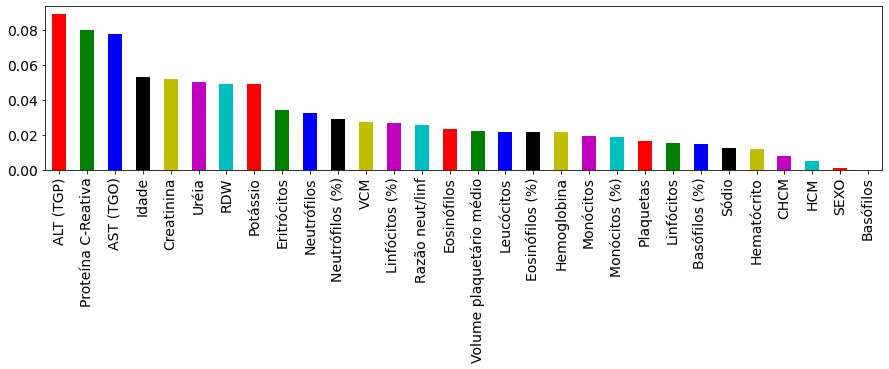

In [ ]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi=mi.sort_values(ascending = False)
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
mi.plot(kind='bar', color=my_colors, figsize=(15,3))
plt.show()

 A incidência de elevação de enzimas hepáticas, principalmente AST e ALT, em pacientes hospitalizados com Covid-19 varia de 14% a 53%, sendo ainda descrita a elevação discreta de bilirrubina total em até 10% dos casos.

FONTE: https://pebmed.com.br/covid-19-como-e-a-relacao-do-novo-coronavirus-com-o-figado/


### **CROSS VALIDATION**

### **AUC TODAS AS VARIÁVEIS**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import time
from imblearn.under_sampling import RandomUnderSampler

#faz o balanceamento das classes
under = RandomUnderSampler(sampling_strategy='majority',  )
X_train, y_train = under.fit_resample(X_train, y_train)

seed = 20

scorer = make_scorer(accuracy_score) # Teste outras

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)


gscv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

algorithms = {
    # testar sem hiperparâmetros
    'kNN':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler(feature_range=(0, 1))),
            ('selector', VarianceThreshold()),
            ('knn', KNeighborsClassifier())]), 
        param_grid={
            'selector__threshold': [0, 0.01, 0.02, 0.03],
            'knn__n_neighbors': [1, 3, 5],
            'knn__p': [1, 2],
        },
        scoring='roc_auc',
        cv=gscv),
    'tree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(random_state=seed))]), 
        param_grid={
            'tree__max_depth': [5, 10, 20],
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring='roc_auc',
        cv=gscv),
    'bigtree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=seed))]), 
        param_grid={
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),
    'svmlinear': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA()),
            ('svm', SVC(kernel='linear', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
        },
        scoring='roc_auc',
        cv=gscv),
    'svmrbf': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA(random_state=seed)),
            ('svm', SVC(kernel='rbf', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
            'svm__gamma': [0.1, 1.0, 2.0],
        },
        scoring='roc_auc',
        cv=gscv),
    'forest': GridSearchCV(  
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('rf', RandomForestClassifier(random_state=seed))]),
        param_grid={
            'rf__max_depth': [1, 5, 10],
            'rf__max_features': ["auto", "sqrt","log2"],
            'rf__n_estimators': [1, 100, 500],
        },
        scoring='roc_auc',
        cv=gscv),
}

ini = time.time()

from sklearn.model_selection import cross_val_score

result = {}
for alg, clf in algorithms.items():
  result[alg] = cross_val_score(clf, X_train, y_train, cv=cv)

result = pd.DataFrame.from_dict(result)
print(result)

fim = time.time()
print('\n')
print('Tempo de execução', round((fim - ini)/60, 4), 'minutos')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


        kNN      tree   bigtree  svmlinear    svmrbf    forest
0  0.775862  0.846675  0.754386   0.822660  0.846059  0.921182
1  0.857759  0.843596  0.719298   0.903941  0.865764  0.980296
2  0.859606  0.905172  0.789474   0.863300  0.880542  0.928571
3  0.866995  0.815271  0.736842   0.852217  0.862069  0.905172
4  0.803571  0.879464  0.803571   0.799745  0.815051  0.923469
5  0.774235  0.753189  0.767857   0.779337  0.778061  0.882653
6  0.859694  0.880102  0.803571   0.909439  0.909439  0.947704
7  0.845663  0.859056  0.803571   0.845663  0.869898  0.933673
8  0.855867  0.922194  0.875000   0.850765  0.859694  0.950255
9  0.852041  0.836735  0.839286   0.821429  0.767857  0.922194


Tempo de execução 18.1596 minutos


In [ ]:
#novo
print(result)

        kNN      tree   bigtree  svmlinear    svmrbf    forest
0  0.775862  0.846675  0.754386   0.822660  0.846059  0.921182
1  0.857759  0.843596  0.719298   0.903941  0.865764  0.980296
2  0.859606  0.905172  0.789474   0.863300  0.880542  0.928571
3  0.866995  0.815271  0.736842   0.852217  0.862069  0.905172
4  0.803571  0.879464  0.803571   0.799745  0.815051  0.923469
5  0.774235  0.753189  0.767857   0.779337  0.778061  0.882653
6  0.859694  0.880102  0.803571   0.909439  0.909439  0.947704
7  0.845663  0.859056  0.803571   0.845663  0.869898  0.933673
8  0.855867  0.922194  0.875000   0.850765  0.859694  0.950255
9  0.852041  0.836735  0.839286   0.821429  0.767857  0.922194


In [ ]:
#novo
result.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std()))

kNN          0.84 ± 0.04
tree         0.85 ± 0.05
bigtree      0.79 ± 0.05
svmlinear    0.84 ± 0.04
svmrbf       0.85 ± 0.05
forest       0.93 ± 0.03
dtype: object

In [ ]:
#antigo
result.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std()))

kNN          0.91 ± 0.01
tree         0.92 ± 0.02
bigtree      0.91 ± 0.02
svmlinear    0.91 ± 0.00
svmrbf       0.91 ± 0.00
dtype: object

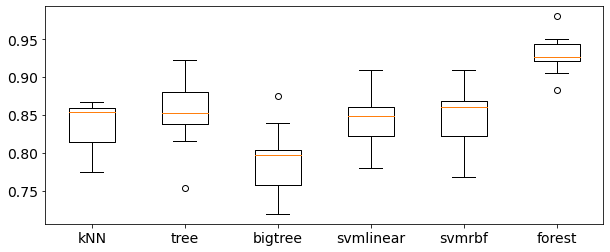

In [ ]:
plt.boxplot([ scores for alg, scores in result.iteritems() ])
plt.xticks(1 + np.arange(result.shape[1]), result.columns)
plt.gcf().set_size_inches(10, 4)
plt.show()